In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
ukterror = pd.read_csv('ukterrorism.csv')

In [3]:
ukterror.head()

,year,month,day,latitude,longitude,target_type
0,1970,6,26,54.994510,-7.319996,Terrorists/Non-State Militia
1,1970,6,27,54.994510,-7.319996,Private Citizens & Property
2,1970,6,27,54.597269,-5.930109,Private Citizens & Property
3,1970,6,27,54.597269,-5.930109,Private Citizens & Property
4,1970,6,27,54.597269,-5.930109,Religious Figures/Institutions


In [4]:
ukterror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5098 entries, 0 to 5097
Data columns (total 6 columns):
year           5098 non-null int64
month          5098 non-null int64
day            5098 non-null int64
latitude       5090 non-null float64
longitude      5090 non-null float64
target_type    5098 non-null object
dtypes: float64(2), int64(3), object(1)
memory usage: 239.0+ KB


In [5]:
ukterror.isnull().sum()

year           0
month          0
day            0
latitude       8
longitude      8
target_type    0
dtype: int64

In [6]:
ukterror.dropna(inplace=True)

In [7]:
ukterror['coord'] = list(zip(ukterror['longitude'],ukterror['latitude']))

C:\Users\william\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\Users\william\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


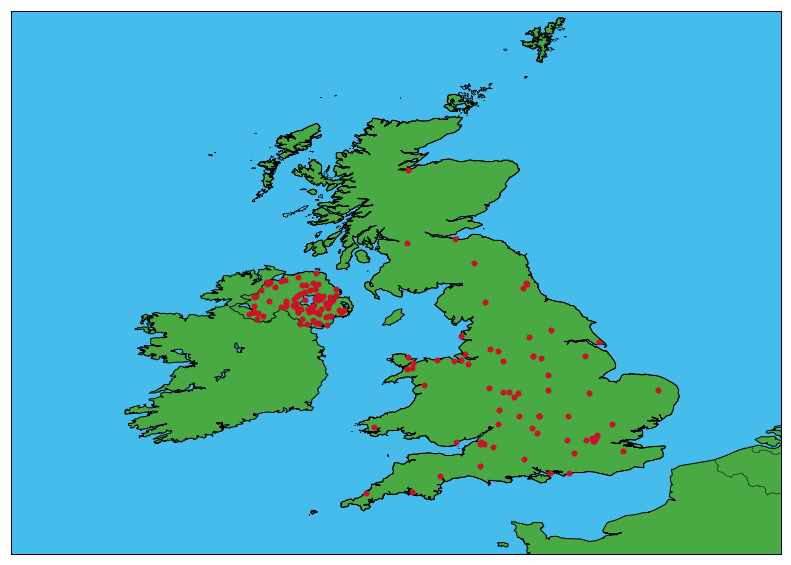

In [8]:
fig, ax = plt.subplots(figsize=(40,10))
map = Basemap(llcrnrlon=-13,llcrnrlat=49,
              urcrnrlon=4,urcrnrlat=61,
              lat_0=54,lon_0=8,
              resolution='i')

map.drawcoastlines()
map.drawcountries(linewidth = 0.5)
map.readshapefile('GBR_adm0','GBR_adm0')
map.fillcontinents(color='#49a942',lake_color='#46bcec')
map.drawmapboundary(fill_color='#46bcec')

for i in ukterror[ukterror['target_type']=='Business']['coord'].unique():
    x,y = i
    map.plot(x,y,marker='o',c='#ce1126',markersize = 5)

plt.show()

C:\Users\william\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


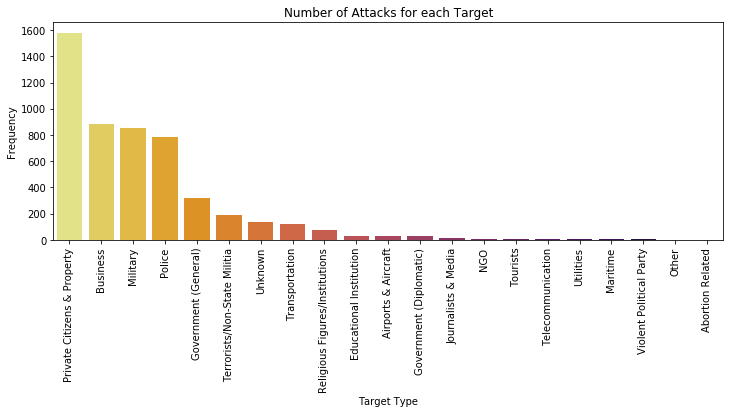

In [9]:
fig, ax = plt.subplots(figsize=(12,4))
sns.countplot('target_type',data=ukterror,palette='inferno_r',order=ukterror['target_type'].value_counts().index)
ax.set_xlabel('Target Type')
ax.set_ylabel('Frequency')
ax.set_title('Number of Attacks for each Target')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

C:\Users\william\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


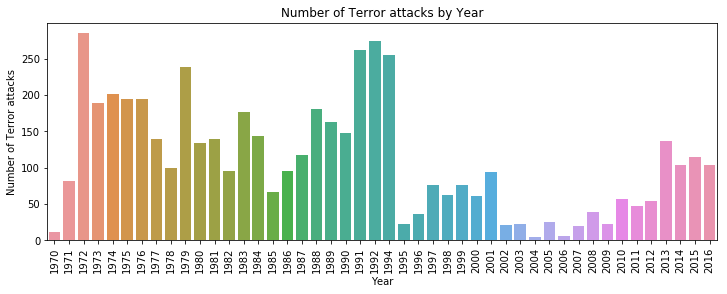

In [10]:
fig, ax = plt.subplots(figsize=(12,4))
sns.countplot('year',data=ukterror)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Terror attacks')
ax.set_title('Number of Terror attacks by Year')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)